
# Diamonds Price Prediction

This notebook focuses on building a predictive regression model to estimate the sales price of diamonds based on their characteristics. The workflow includes preparing the data, selecting relevant features, and training machine learning models to achieve accurate predictions.

<!-- ## CONTENTS -->
<!--
    1. Importing Libraries

    2. Data Loading and Preprocessing
        - Load cleaned data
        - Encoding

    3. Model Training
        - Base Model

    4. Model Optimization:
        i)   Feature Engineering
        ii)  Normalization
        iii) Model Selection
    
    5. Visualization
   -->

## CONTENTS

    1. Importing Libraries

    2. Data Loading and Understanding Dataset
        • Load dataset
        • Understand the data

    3. Data Preprocessing
        A. Data Cleaning
            • Handle missing values and duplicates
            • Fix inconsistent data and outliers

        B. Feature Engineering
            • Create new features
            • Transformations

        C. Encoding and Scaling
            • Encode categorical variable
                ○ one hot encoding vs ordinal
            • Scale numerical features
                ○ Standardization (StandardScaler)
                ○ Normalization (MinMaxScaler)

    4. Feature Selection

    5. Modeling
        A. Baseline Model
            • Train a simple model
            • Evaluate the performance benchmark
        B. Model Selection
            • Compare mutltiple algorithms
            • Cross validation with Hyperparameter Tuning

    6. Final Model Training and Evaluation

    7. Deployment and Prediction


## 1. Importing Libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import timeit

from tqdm.notebook import tqdm as tqdm_nb, trange as trange_nb
from tqdm import tqdm
import json, joblib
# from tqdm.contrib.sklearn import progress_cross_val_score

import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import (
    train_test_split, 
    cross_validate, cross_val_score,
    KFold, GridSearchCV, RandomizedSearchCV)

from sklearn.preprocessing import (
    StandardScaler,RobustScaler,
    MinMaxScaler, 
    QuantileTransformer, quantile_transform,
    Normalizer, power_transform, PowerTransformer,
    PolynomialFeatures, 
    OneHotEncoder, OrdinalEncoder, LabelEncoder)
from sklearn.impute import SimpleImputer

from sklearn.linear_model import (
    LinearRegression, Ridge, RidgeCV, Lasso, SGDRegressor)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, \
    GradientBoostingRegressor, AdaBoostRegressor, \
        ExtraTreesRegressor, HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.metrics import (
    mean_squared_error, r2_score,
    mean_absolute_error, mean_absolute_percentage_error, 
    median_absolute_error, make_scorer, root_mean_squared_error)

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import (
    make_column_transformer, TransformedTargetRegressor, 
    make_column_selector, ColumnTransformer)

from sklearn import svm
from sklearn.svm import SVR, SVC
from sklearn.decomposition import PCA
import statsmodels.api as sm
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

from scipy.stats import boxcox
from scipy.special import inv_boxcox
from sklearn.preprocessing import FunctionTransformer

import inspect
from tabnanny import check
from unittest import result
from pyparsing import col
from sklearn import clone
from sklearn.metrics import check_scoring
from sklearn.model_selection import ParameterSampler
from sklearn.utils.validation import check_random_state

from scipy.stats.mstats import winsorize


rng = np.random.RandomState(42)

ImportError: cannot import name 'root_mean_squared_error' from 'sklearn.metrics' (c:\Users\tsree\anaconda3\envs\ml_env\lib\site-packages\sklearn\metrics\__init__.py)

In [2]:
# Global variables
scoring_dict = {  # evaluation metrics dictionary
        'mae': 'neg_mean_absolute_error',
        'rmse': 'neg_mean_squared_error',
        'r2': 'r2',
        'mape': 'neg_mean_absolute_percentage_error',
        'medae': 'neg_median_absolute_error'}


## 2. Data Loading and Understanding Data

#### i) Data loading

In [3]:
df = pd.read_pickle('../data/raw/diamonds_cleaned.pkl')
df.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,...,2.87,1.79,M,M,unknown,unknown,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,...,2.89,1.78,STK,STK,unknown,unknown,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,2.90,1.77,TN,M,unknown,unknown,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,2.88,1.78,M,STK,unknown,unknown,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,...,2.83,1.82,STK,STK,unknown,unknown,unknown,unknown,unknown,200


#### ii) Understanding data

In [4]:
# Check the data
display(df.head(5))

# Shape
print(f"df shape: {df.shape}\n")
# Data types (df.dtypes)
# print(df.dtypes)

# Column types
display(df.info())

# Basic stats
display(df.describe())

# Missing values
print(f"sum of missing values: {df.isnull().sum().sum()}\n")

# Duplicates
print(f"sum of duplicated rows: {df.duplicated().sum()}\n")


,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,...,2.87,1.79,M,M,unknown,unknown,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,...,2.89,1.78,STK,STK,unknown,unknown,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,2.90,1.77,TN,M,unknown,unknown,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,2.88,1.78,M,STK,unknown,unknown,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,...,2.83,1.82,STK,STK,unknown,unknown,unknown,unknown,unknown,200


df shape: (209496, 24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209496 entries, 0 to 209495
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   cut                          209496 non-null  object 
 1   color                        209496 non-null  object 
 2   clarity                      209496 non-null  object 
 3   carat_weight                 209496 non-null  float64
 4   cut_quality                  209496 non-null  object 
 5   lab                          209496 non-null  object 
 6   symmetry                     209496 non-null  object 
 7   polish                       209496 non-null  object 
 8   eye_clean                    209496 non-null  object 
 9   culet_size                   209496 non-null  object 
 10  culet_condition              209496 non-null  object 
 11  depth_percent                209496 non-null  float64
 12  table_percent                20949

None

,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,209496.000000,209496.000000,209496.000000,209496.000000,209496.00000,209496.000000,2.094960e+05
mean,0.760547,63.080517,59.204791,5.603246,5.17902,3.257328,7.009379e+03
std,0.848853,3.675149,4.060871,1.689823,1.28437,0.816098,2.631816e+04
min,0.080000,25.900000,34.500000,0.050000,0.21000,0.520000,2.000000e+02
25%,0.310000,61.400000,57.000000,4.350000,4.31000,2.680000,9.560000e+02
50%,0.500000,62.500000,58.000000,5.070000,4.81000,3.040000,1.960000e+03
75%,1.000000,63.600000,60.000000,6.370000,5.72000,3.670000,5.367000e+03
max,19.350000,98.700000,94.000000,23.830000,17.25000,10.470000,1.449881e+06


sum of missing values: 0

sum of duplicated rows: 7



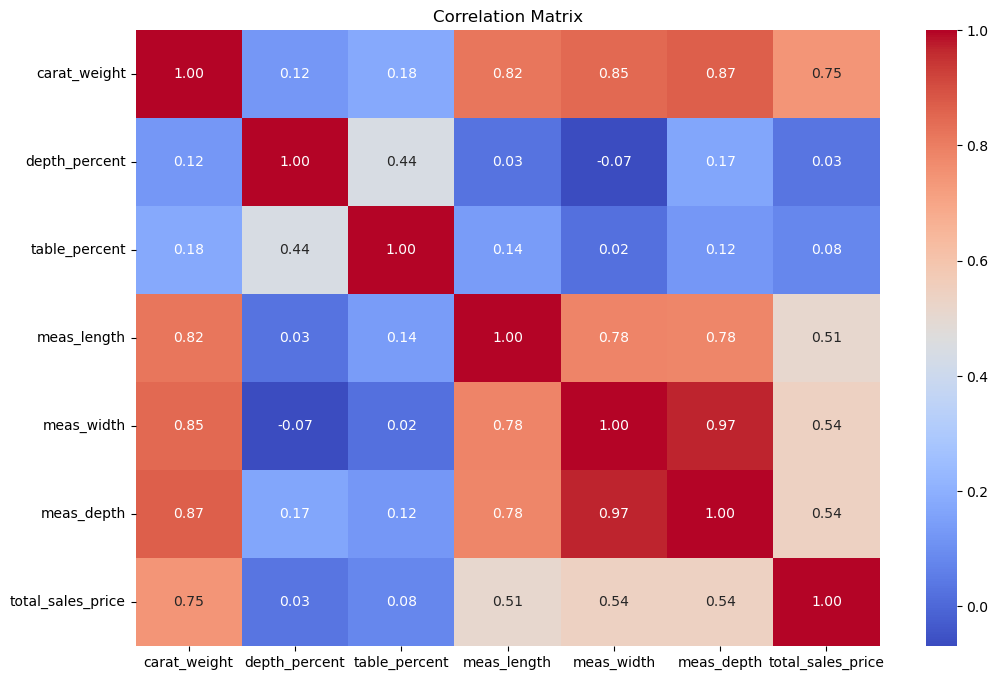

In [5]:
# Correlation matrix
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [6]:
# Check for multicollinearity
def calculate_vif(X):
    """
    Calculate Variance Inflation Factor (VIF) for each feature in the dataset.
    """
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [vif(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Calculate VIF for the features
X = numeric_df.drop(columns=['total_sales_price'])
vif_data = calculate_vif(X)
print(vif_data.sort_values("VIF", ascending=False))

         feature         VIF
5     meas_depth  491.503780
4     meas_width  363.206799
1  depth_percent  331.770172
2  table_percent  269.031393
3    meas_length   40.170754
0   carat_weight    9.228633


There is high multicollinearity between some features, particularly:
- meas_width and meas_depth (correlation of 0.97)
- meas_length and carat_weight (correlation of 0.82)
- depth_percent and table_percent (VIF of 352.19 and 270.96 respectively)

To address this problem:

- we will drop meas_width and meas_depth due to their extrememly correlation with the other features
- create new feature which is a ratio of table and depth percent 
- drop depth_percent, table_percent and meas_length as a result of the new feature 'depth_to_table_ratio'


count    2.094960e+05
mean     7.009379e+03
std      2.631816e+04
min      2.000000e+02
25%      9.560000e+02
50%      1.960000e+03
75%      5.367000e+03
max      1.449881e+06
Name: total_sales_price, dtype: float64


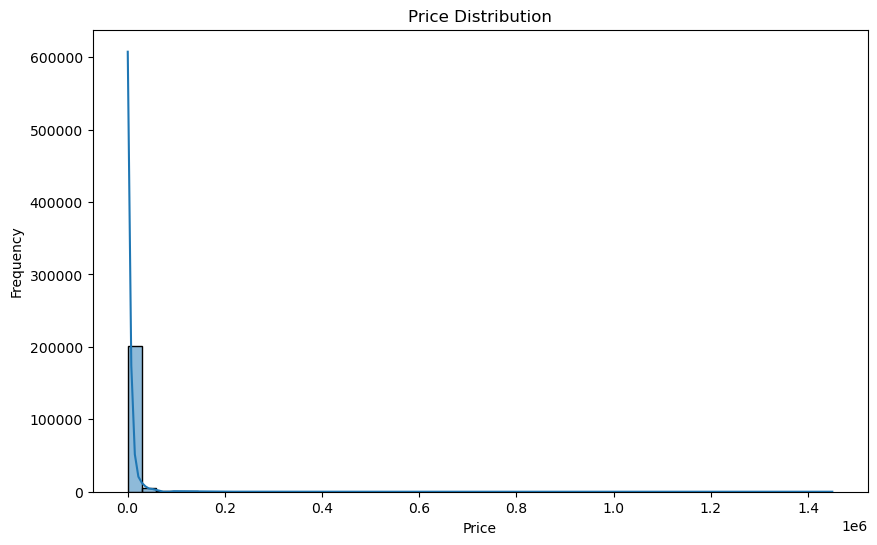

In [7]:
# Check the target variable distribution
print(df['total_sales_price'].describe())

# Plot the target variable distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['total_sales_price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

We can see that the target variable is extremely right-skewed. 

To address this, we can apply a log transformation to the target variable.

#### iii) Defining preprocessing functions 

In [ ]:
# Define a function to split the data into train and test sets
def split_data(given_df=None, train_test=None, X_y=None, shuffle=True):
    inputs = [given_df, train_test, X_y]
    # Check if the inputs are valid
    try:
        if given_df is not None and not isinstance(given_df, pd.DataFrame):
            raise ValueError('given_df must be a pandas dataframe.')
        if train_test is not None and not isinstance(train_test, tuple) and len(train_test) != 2:
            raise ValueError('train_test must be a tuple of (train, test).')
        if X_y is not None and not isinstance(X_y, tuple) and len(X_y) != 2:
            raise ValueError('X_y must be a tuple of (X, y).')
        # Check if at least one of the inputs is provided
        if all(x is None for x in inputs):
            raise ValueError('Please provide either a dataframe, train_test tuple or X_y tuple.')
        # Check if more than one input is provided
        if sum(x is not None for x in inputs) > 1:
            raise ValueError('Please provide only one of the following: dataframe, train_test tuple or X_y tuple.')
    except ValueError as e:
        print("Caught an error: ", e)
        raise
    
    try:
        if given_df is not None:
            # Split the data into train and test sets
            X, y = given_df.drop('total_sales_price', axis=1), given_df['total_sales_price']
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=shuffle)
        elif train_test is not None:
            temp_train = train_test[0]
            temp_test = train_test[1]
            X_train, y_train = temp_train.drop('total_sales_price', axis=1), temp_train['total_sales_price']
            X_test, y_test = temp_test.drop('total_sales_price', axis=1), temp_test['total_sales_price']
        elif X_y is not None:
            X, y = X_y[0], X_y[1]
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=shuffle)
    except:
        print("Caught an error in split_data function")
        raise

    return X_train, X_test, y_train, y_test


def train_test_split_encode(df, preprocessor=None, test_size=0.2, random_state=42):
    # Split the data into train and test sets
    X_train_temp, X_test_temp, y_train, y_test = split_data(given_df=df, train_test=None, shuffle=True)
    if preprocessor is not None:
        X_train = pd.DataFrame(preprocessor.fit_transform(X_train_temp), \
                                 columns=preprocessor.get_feature_names_out())
        X_test = pd.DataFrame(preprocessor.transform(X_test_temp), \
                                columns=preprocessor.get_feature_names_out())
    else:
        X_train = X_train_temp.copy()
        X_test = X_test_temp.copy()
    return X_train, X_test, y_train, y_test


# Define a function to plot the model 
def plot_model(model, X_test, y_test):
    # Plot the model
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Sales Price')
    plt.ylabel('Predicted Sales Price')
    plt.show()


# Define a function to plot the fit 
def plot_fit(model, X_test, y_test, num_of_points=150):
    # Plot the model
    y_pred = model.predict((X_test))
    y_test_numpy = y_test.to_numpy()

    n = int((y_test_numpy.shape[0])*0.8)
    
    plt.figure(figsize=(50,10))
    plt.plot(y_pred[n:n+num_of_points], 'b+-', label='predicted', linewidth=3)
    plt.plot(y_test_numpy[n:n+num_of_points],'ro--',label='actual', linewidth=3)
    plt.legend()
    plt.show()


# Plot the residuals
def plot_residuals(model, X_test, y_test):
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    plt.scatter(y_test, residuals)
    plt.xlabel('Actual')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Actual')
    plt.show()


# Define a function to save image
def save_image(fig, image_name):
    fig.savefig('../images/' + image_name + '.png')


# Define a function to save the model
def save_model(model, model_name):
    joblib.dump(model, open('../models/' + model_name + '.pkl', 'wb'))

# Define a function to load the model
def load_model(model_name):
    return joblib.load(open('../models/' + model_name + '.pkl', 'rb'))


## 3. Data Preprocessing

### A. Data Cleaning

#### i) Handle missing and duplicate values

In [9]:
# Drop duplicate entries
df.drop_duplicates(inplace=True, ignore_index=True)
print(df.duplicated().sum())

print(df.isnull().sum().sum())

0
0


#### ii) Fix inconsistent categorical data

Since we are using the cleaned data from the eda notebook, 
the missing and inconsistent values are already handled.

#### iii) Handle outliers

In [10]:
# Finding outliers
outliers_df = pd.DataFrame(columns=list(df))

# Define a function to print and plot the outliers
def print_plot_outliers(outlier_df, method_name):
    # Print the number of outliers detected
    print(f"Number of outliers detected: {len(outlier_df)}\n")
    # Plot the outliers
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=outlier_df, orient='h')
    plt.title('Outliers Detected using ' + method_name)
    plt.xlabel(method_name)
    plt.show()


In [11]:
# Save cleaned dataframe and Keep final test data for later
df, final_test_df = train_test_split(df, test_size=0.2, random_state=42)

df_clean = df.copy()
df_clean.to_pickle('../data/processed/modeling_cleaned_wo_testdf.pkl')
final_test_df.to_pickle('../data/processed/modeling_cleaned_with_final_testdf.pkl')

### B. Feature Engineering

#### i) Create new features

In [12]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [13]:
# Calculate VIF for numerical features
numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns
numerical_features = numerical_columns.drop('total_sales_price')
numerical_X = train_df[numerical_features]

vif_data = pd.DataFrame()
vif_data['Feature'] = numerical_X.columns
vif_data['VIF'] = [vif(numerical_X.values, i) for i in range(numerical_X.shape[1])]

print(vif_data)

         Feature         VIF
0   carat_weight    9.375322
1  depth_percent  328.005899
2  table_percent  266.073537
3    meas_length   40.112458
4     meas_width  355.171188
5     meas_depth  481.310562


In [14]:
# Define a function for feature engineering
def feature_engineering_numerical(df, test_df=None):
    if test_df is not None:
        df = pd.concat([df, test_df], axis=0)
    # Create a copy of the DataFrame to avoid modifying the original data
    temp_df = df.copy()

    # Create new features(ratios)
    temp_df['depth_to_table_ratio'] = round((temp_df['depth_percent'] / temp_df['table_percent']), 2)
    # Drop individual dimensions to reduce multicollinearity
    drop_columns = ['meas_width', 'meas_depth', \
        'depth_percent','table_percent', 'meas_length']
    temp_df = temp_df.drop(drop_columns, axis=1)

    if test_df is not None:
        temp_test_df = temp_df.loc[test_df.index,:]
        temp_train_df = temp_df.loc[train_df.index,:]
    else:
        temp_train_df = temp_df.copy()
        temp_test_df = None

    num_features = temp_train_df.select_dtypes(exclude=['object']).columns.drop('total_sales_price')
    return num_features, temp_train_df, temp_test_df


# Apply feature engineering to the data
numerical_features, train_df_eng, test_df_eng  = feature_engineering_numerical(train_df, test_df=test_df)

# Check for multicollinearity using VIF after dropping highly correlated features
train_numerical_X = train_df_eng[numerical_features]
vif_data = pd.DataFrame()
vif_data['Feature'] = train_numerical_X.columns
vif_data['VIF'] = [vif(train_numerical_X.values, i) for i in range(train_numerical_X.shape[1])]

print(vif_data)

                Feature       VIF
0          carat_weight  1.789111
1  depth_to_table_ratio  1.789111


Tree Regressor models would be the better suited predictor rather than linear regression models as there is no linear relationship(most likely) between target variable and features. We will check that later on in the notebook.

#### ii) Transformations

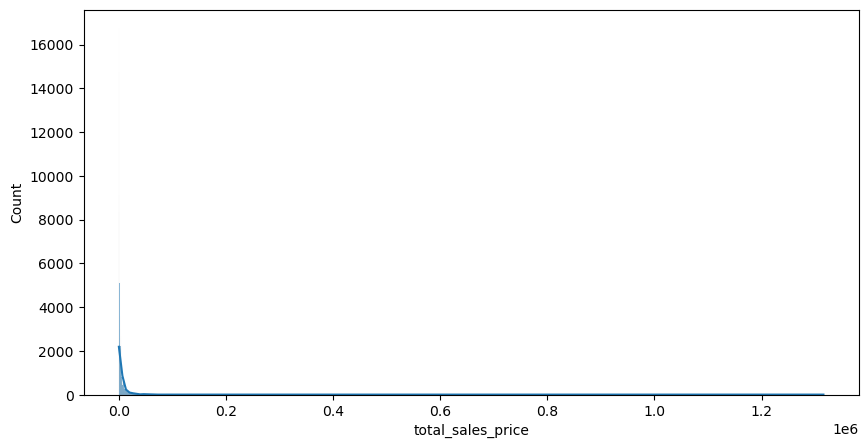

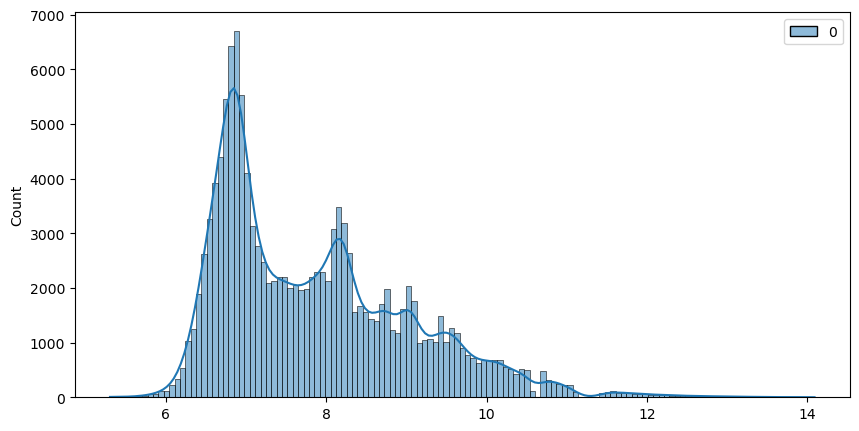

In [15]:
# visualizing the distribution of the target variable
y_train = train_df['total_sales_price']
plt.figure(figsize=(10, 5))
sns.histplot(y_train, kde=True)
plt.show()

# visualizing the distribution of the target variable after applying log transformation
log_transformer = FunctionTransformer(np.log1p)
y_train_log = log_transformer.fit_transform(y_train.values.reshape(-1, 1))
plt.figure(figsize=(10, 5))
sns.histplot(y_train_log, kde=True)
plt.show()

### C. Encoding and Scaling

#### i) Encode categorical variables

In [16]:
categorical_features = [x for x in df.columns if df[x].dtype == 'object']
numerical_features = [x for x in df.columns if df[x].dtype != 'object']
numerical_features_wo_y = numerical_features.copy()
numerical_features_wo_y.remove('total_sales_price')
print(len(categorical_features))

numerical_X = df[numerical_features_wo_y]
numerical_df = df[numerical_features]

17


In [17]:
# Categories for encoding 
cat_values = pd.DataFrame(train_df[categorical_features].apply(lambda x: x.unique().tolist()))
with pd.option_context('display.max_colwidth', 1):
    display(cat_values)

,0
cut,"[Round, Oval, Radiant, Princess, Cushion Modified, Emerald, Pear, Asscher, Heart, Marquise, Cushion]"
color,"[I, H, E, G, D, L, unknown, F, J, K, M]"
clarity,"[VS1, VVS2, VS2, VVS1, SI2, I1, IF, SI1, I2, I3]"
cut_quality,"[Excellent, unknown, Very Good, Good, Fair, Ideal]"
lab,"[GIA, IGI, HRD]"
symmetry,"[Very Good, Excellent, Good, Fair, Poor]"
polish,"[Very Good, Excellent, Good, Fair, Poor]"
eye_clean,"[unknown, Yes, Borderline, E1, No]"
culet_size,"[N, unknown, L, VS, M, SL, S, VL, EL]"
culet_condition,"[unknown, Pointed, Chipped, Abraded]"


In [74]:
# Dictionary to store ordered categorical values for encoding in ascending order
categorical_features = [x for x in train_df.columns if train_df[x].dtype == 'object']
ordered_columns = [ 'color', 'clarity','cut_quality', 'symmetry', 'polish', 'eye_clean', 'fancy_color_intensity', 'girdle_min', 'girdle_max']
unordered_columns = [x for x in categorical_features if x not in ordered_columns]

cat_values.loc['color',0] = ['M','L','K','J','I','H','G','F','E','D']
# cat_values.loc['color',0] = ['unknown', 'faint color', 'near colorless', 'colorless']

cat_values.loc['clarity',0] = ['I3', 'I2', 'I1','SI3', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
# cat_values.loc['clarity',0] = ['unknown', 'I', 'SI', 'VS', 'VVS', 'IF']

list1 = [ 'Poor','Fair', 'Good', 'Very Good', 'Excellent', 'Ideal']
cat_values.loc['cut_quality',0] = list1
cat_values.loc['symmetry',0] = list1
cat_values.loc['polish',0] = list1

cat_values.loc['eye_clean',0] = ['unknown', 'No', 'Borderline', 'E1', 'Yes']
cat_values.loc['culet_size',0] = ['unknown', 'N', 'VS', 'S', 'M', 'SL', 'L', 'VL', 'EL']

list2 = ['unknown', 'XTN', 'VTN', 'TN', 'STN', 'M', 'STK', 'TK', 'VTK', 'XTK']
cat_values.loc['girdle_min',0] = list2
cat_values.loc['girdle_max',0] = list2

cat_values.loc['fancy_color_intensity',0] = ['Faint', 'Very Light', 'Light', 'Fancy Light', 'Fancy', 'Fancy Intense', 'Fancy Vivid', 'Fancy Dark', 'Fancy Deep']

In [ ]:
# Define preprocessors
preprocessors = {}

# ordinal for ordered data + one-hot encoding for unordered data
preprocessors['ordinal+one_hot'] = make_column_transformer(
    (OrdinalEncoder(categories=cat_values[0][ordered_columns].to_list(), \
                    handle_unknown='use_encoded_value', unknown_value=-1), ordered_columns),
    (OneHotEncoder(handle_unknown='ignore'), unordered_columns),
    remainder='passthrough',
    verbose_feature_names_out=False
)

preprocessors['one_hot'] = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), categorical_features),
    remainder='passthrough',
    verbose_feature_names_out=False
)

#### ii) Scale numerical features

In [ ]:
# Compare different scalers on base model
numerical_columns = train_df_eng.select_dtypes(exclude=['object']).columns
numerical_features = numerical_columns.drop('total_sales_price')

scalers = [RobustScaler(), StandardScaler(with_mean=False, with_std=True), MinMaxScaler(), Normalizer(norm='l2'), 
           QuantileTransformer(output_distribution='normal'), PowerTransformer(method='yeo-johnson')]

**Note:**
Normalizer, RobustScalar, and StandardScalar work the best, with first priority going to the Normalizer.

## 4. Feature Selection

In [84]:
from sklearn.feature_selection import RFECV, SelectFromModel

# Wrapper methods: recursive feature eliminationabs
feature_selector_rfecv = RFECV(
    estimator=RandomForestRegressor(n_estimators=50),
    cv=5,
    scoring="neg_mean_squared_error")

# Embedded methods: SelectFromModel
feature_selector_sfm = SelectFromModel(
    RandomForestRegressor(random_state=42), 
    threshold='median')

feature_selector_kbest = SelectKBest(score_func=f_regression, k=15)


## 5. Modeling

### A. Base Model
We will train a Random Forest Model with all the features and measure the errors to assess the base models' accuracy.

In [65]:
# CROSS-VALIDATION FUNCTIONS

scoring_for_cv = {
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2',
    'medae': 'neg_median_absolute_error'}

# Function to calculate average metrics from cross-validation results
def cross_validation_metrics(cv_results):
    cv_metrics = {  # Convert negative metrics to positive
        'cv_mae': -np.mean(cv_results['test_mae']),
        'cv_rmse': np.sqrt(-np.mean(cv_results['test_rmse'])),
        'cv_r2': np.mean(cv_results['test_r2']),
        'cv_medae': -np.mean(cv_results['test_medae']) 
    }
    return cv_metrics

# Function to cross validate the model
def cross_validate_model(model, X, y, cv=5):
    X_train_sample, y_train_sample = X, y

    scoring_metrics = scoring_for_cv 

    # Cross-validate
    cv_results = cross_validate(model, X_train_sample, y_train_sample, cv=cv, scoring=scoring_metrics, verbose=3, error_score='raise')
    cv_metrics = cross_validation_metrics(cv_results)
    return cv_metrics 

In [ ]:
# Define a function to get the feature importances
def get_feature_importances(model, X_train=None, feature_names=None):
    """
    Extracts feature importances or coefficients from a model or pipeline.
    Works with:
    - Tree-based models (RandomForest, XGBoost: `.feature_importances_`)
    - Linear models (Ridge, Lasso: `.coef_`)
    - Pipelines (extracts the final estimator's importances)
    - TransformedTargetRegressor (unwraps the inner model)
    
    Args:
        model: Fitted scikit-learn model or pipeline.
        X_train: Training data (used to get feature names).
        
    Returns:
        DataFrame of feature importances, sorted in descending order.
    """
    # Handle TransformedTargetRegressor (extract the inner regressor)
    if hasattr(model, 'regressor'):
        model = model.regressor
    
    # Handle Pipeline (extract the final step)
    if hasattr(model, 'named_steps'):
        model = model.named_steps[list(model.named_steps.keys())[-1]]
    
    # Get importances/coefficients
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = model.coef_
        # For linear models, take absolute values (sign doesn't indicate importance)
        importances = np.abs(importances)
    else:
        raise AttributeError(
            'Model does not have "feature_importances_" or "coef_". '
            f'Model type: {type(model).__name__}'
        )
    
    # Get feature names (handle ColumnTransformer)
    if feature_names is not None:
        names = feature_names
    elif hasattr(model, 'feature_names_in_'):
        names = model.feature_names_in_
    elif hasattr(X_train, 'columns'):
        feature_names = X_train.columns.tolist()
    else:
        feature_names = [f'feature_{i}' for i in range(len(importances))]
    
    # Create DataFrame
    feature_importances = pd.DataFrame(
        {'importance': importances},
        index=feature_names
    ).sort_values('importance', ascending=False)
    
    return feature_importances

In [77]:
# Define a function to fit and evaluate the model 
def evaluate_model(model, X_train, y_train, X_test, y_test, cv=None, verbose=True):
    """
    Fit a model and evaluate its performance on the test set.

    Parameters:
    - model: The machine learning model to evaluate.
    - X_train, y_train: Training data.
    - X_test, y_test: Test data.
    - verbose: If True, print the evaluation metrics.

    Returns:
    - clf: The trained model.
    - metrics: A dictionary of evaluation metrics.
    """
    # Cross-validate the model
    if cv is not None:
        cv_metrics = cross_validate_model(model,X_train,y_train,cv)
    else: 
        cv_metrics = None

    
    # Fit and Evaluate the model
    trained_clf = model.fit(X_train, y_train)
    y_pred = trained_clf.predict(X_test)

    metrics = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R^2': r2_score(y_test, y_pred),
        'MAPE': mean_absolute_percentage_error(y_test, y_pred),
        'MedAE': median_absolute_error(y_test, y_pred)
    }

    # Print the evaluation metrics
    if verbose:
        print('Test Evaluation Metrics:')
        for metric, value in metrics.items():
            print(f'{metric}: {value:.4f}')
        if cv is not None:
            print('\nCross-Validation Metrics:')
            for metric, value in cv_metrics.items():
                print(f'{metric}: {value:.4f}')
                
    return trained_clf, metrics, cv_metrics

In [ ]:

def train_evaluate_pipeline(estimator, train_df, test_df, sample_split=1.0, cv=None, verbose=True, features=False):
    """
    1. Apply feature engineering on train and test data, then sample the data
    2. Train and evaluate a pipeline with preprocessing, feature selection, and model

    Parameters:
    - estimator: The machine learning pipeline to evaluate
    - train_df: The training DataFrame
    - test_df: The test DataFrame
    - log_transform: If True, apply log transformation to the target variable
    - sample_split: Fraction of the data to sample for training
    - cv: Cross-validation folds (Default: None)
    - verbose: If True, print the evaluation metrics
    - features: If True, return feature importances
    Returns:
    - trained_model
    - metrics: A dictionary of test evaluation metrics 
    - cv_metrics: A dictionary of cross-validation metrics (if cv is provided)
    - feature_importances: A Dataframe of feature importances (if features is True)
    """
    # Feature eng.
    _, train_df_eng, test_df_eng  = feature_engineering_numerical(train_df, test_df=test_df)
    train_df_sample = train_df_eng.sample(frac=sample_split, random_state=42).reset_index(drop=True)
    test_df_sample = test_df_eng.sample(frac=sample_split, random_state=42).reset_index(drop=True)

    # Split the data into train and test sets
    X_train_sample, X_test_sample, y_train_sample, y_test_sample = split_data(train_test=[train_df_sample, test_df_sample], shuffle=True)

    # Train and evaluate the model
    trained_model,metrics,cv_metrics = evaluate_model(estimator, X_train_sample, y_train_sample, \
                                        X_test_sample, y_test_sample, cv=None, verbose=verbose)
    
    # Get feature importances if features are selected
    feature_importances = None
    if features:
        try:
            inner_pipeline = trained_model.regressor_
        except:
            inner_pipeline = trained_model

        encoded_feature_names = inner_pipeline.named_steps['preprocessor']\
        .get_feature_names_out(input_features=X_train_sample.columns)
        selected_feature_names = inner_pipeline.named_steps['feature_selector']\
        .get_feature_names_out(input_features=encoded_feature_names)

        feature_importances = get_feature_importances(inner_pipeline, feature_names=selected_feature_names)

    return trained_model,metrics,cv_metrics,feature_importances


# Create a pipeline with preprocessing, feature selction and model
preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), categorical_features),
    (StandardScaler(with_mean=False), numerical_features),
    remainder='passthrough',
    verbose_feature_names_out=False
)

preprocessors['label+ordinal'] = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),  # Impute NaNs
            ('scaler', 'passthrough')
        ]), numerical_features.tolist()),
        ('cat_ordered', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Mode imputation for categorical
            ('ordered', OrdinalEncoder(categories=cat_values[0][ordered_columns].to_list(),
                                   handle_unknown='use_encoded_value', 
                                   unknown_value=-1))]), ordered_columns),
        ('cat_unordered', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Mode imputation for categorical
            ('unordered', OrdinalEncoder(handle_unknown='use_encoded_value',
                                     unknown_value=-1))]), unordered_columns)
    ], remainder='passthrough')
preprocessor_for_trees = preprocessors['label+ordinal']


Test Evaluation Metrics:
MAE: 944.0292
MSE: 103549045.9858
RMSE: 10175.9052
R^2: 0.8666
MAPE: 0.0972
MedAE: 124.8804
                                           importance
num__carat_weight                            0.706437
cat_ordered__color                           0.130033
cat_ordered__clarity                         0.050586
cat_unordered__fancy_color_dominant_color    0.043718
cat_ordered__fancy_color_intensity           0.023553
num__depth_to_table_ratio                    0.020072
cat_unordered__cut                           0.009552
cat_ordered__girdle_min                      0.005579
cat_ordered__girdle_max                      0.005377
cat_unordered__lab                           0.005093


In [ ]:

base_model = Pipeline([
    ('preprocessor', preprocessor_for_trees),
    ('feature_selector', feature_selector_sfm),
    ('rf_model', RandomForestRegressor(n_estimators=20, random_state=42)),
])

# Train and evaluate the pipeline 
trained_base_model,_,_,feat_importances = train_evaluate_pipeline(base_model, train_df, test_df, sample_split=1, features=True, verbose=True)
print(feat_importances.head(10))

# Save the model
save_model(trained_base_model, 'base_model')

### B. Model Selection

#### i) Comapare multiple models

In [87]:
# Preprocess DATA and SAMPLE
sample_split = 0.3
_, train_df_eng,_  = feature_engineering_numerical(train_df)
train_df_sample = train_df_eng.sample(frac=sample_split, random_state=42).reset_index(drop=True)
X_train_sample, y_train_sample = train_df_sample.drop('total_sales_price', axis=1), train_df_sample['total_sales_price']

In [89]:
# Building Pipelines
lr = LinearRegression()
model_svm = svm.SVR(kernel='linear')
ridge = RidgeCV(alphas=(np.logspace(-3, 3, 10)))
dtr = DecisionTreeRegressor(max_depth=12)
rf = RandomForestRegressor(n_estimators=10)
knn = KNeighborsRegressor(n_neighbors=10)
sgd = SGDRegressor(fit_intercept=False)
xgb = XGBRegressor(n_estimators=10)
gb = GradientBoostingRegressor(n_estimators=10)
hgb = HistGradientBoostingRegressor(max_iter=100, max_depth=12)
et = ExtraTreesRegressor(n_estimators=10)
ada = AdaBoostRegressor(n_estimators=10)

# evaluate the models using cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
models = [lr, ridge, dtr, rf, knn, sgd, xgb, gb, et, ada]
log_transform = True
no_log_transform = False

for model in models:
    print(f"\n{model.__class__.__name__}")
    estimator = make_pipeline(preprocessor_for_trees, model)
    if log_transform:
        print("with log transformation")
        full_pipline = TransformedTargetRegressor(
            regressor=estimator,
            func=np.log1p,
            inverse_func=np.expm1)
        res = cross_validate_model(full_pipline, X_train_sample,y_train_sample, cv=cv)
    if no_log_transform:
        print("\nwithout log transform\n")
        res2 = cross_validate_model(estimator, X_train_sample,y_train_sample, cv=cv, log_transform = not no_log_transform)



LinearRegression
with log transformation
[CV] END  mae: (test=-2693102.819) medae: (test=-748.020) r2: (test=-75870735.168) rmse: (test=-234207626.892) total time=   0.3s
[CV] END  mae: (test=-341479665.999) medae: (test=-736.455) r2: (test=-1370579933938.135) rmse: (test=-30583415755.233) total time=   0.3s
[CV] END  mae: (test=-36143729.873) medae: (test=-741.851) r2: (test=-15163652047.810) rmse: (test=-3107024126.671) total time=   0.3s
[CV] END  mae: (test=-7650348.683) medae: (test=-722.067) r2: (test=-204948925.705) rmse: (test=-469325721.705) total time=   0.3s
[CV] END  mae: (test=-13805984.721) medae: (test=-739.259) r2: (test=-2374005323.039) rmse: (test=-1219511470.005) total time=   0.3s

RidgeCV
with log transformation
[CV] END  mae: (test=-2602204.267) medae: (test=-748.285) r2: (test=-70782391.327) rmse: (test=-226217658.636) total time=   0.4s
[CV] END  mae: (test=-325039789.842) medae: (test=-737.027) r2: (test=-1241715550962.698) rmse: (test=-29110178205.800) total 

**Note:**
We can see that out of all the models we've tested above, extra trees regressor is the best one followed by random forest regressor and hist gradient boosting regressor; which corroborates our predicted best model type of tree regressors.


#### ii) Cross Validate with Hyper Parameter Tuning

In [120]:
# Hyperparameter tuning for ExtraTreesRegressor
param_grid = {
    'feature_selector__max_features': [5, 10],
    'extratreesregressor__n_estimators': [100,200],
    'extratreesregressor__max_depth': [None, 16, 32],
    'extratreesregressor__max_features': [None, 'sqrt','log2'],
    'extratreesregressor__min_samples_split': [2, 4, 6],
    'extratreesregressor__min_samples_leaf': [1, 2],    
}

# Preprocessing
num_pipeline = make_pipeline(StandardScalar())
cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore', drop='first'))
preprocessor = make_column_transformer(
    (num_pipeline, train_df_eng.select_dtypes(exclude='object').columns.drop('total_sales_price')),
    (cat_pipeline, train_df.select_dtypes(include='object').columns),
    remainder='passthrough',
    verbose_feature_names_out=False)

scoring_forCV = {
    'mse': 'neg_mean_squared_error',
    'rmse': 'neg_root_mean_squared_error',}

# Randomized search
et = ExtraTreesRegressor(random_state=42)
pipe_et = Pipeline([
    ('preprocessor', preprocessor_for_trees),
    ('feature_selector', SelectFromModel(estimator=et, max_features=10, threshold=-np.inf)),
    ('extratreesregressor', et)
])

random_search = RandomizedSearchCV(
    pipe_et, param_grid,
    n_iter=100, cv=3, n_jobs=-1, verbose=3, 
    scoring=scoring_forCV, 
    refit='mse',
    random_state=42)


random_search.fit(X_train_sample, y_train_sample)

# Get the best estimator
search = random_search.best_estimator_
print("Best params:", random_search.best_params_)
save_model(search, 'et_best_hyperparams')


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best params: {'feature_selector__max_features': 10, 'extratreesregressor__n_estimators': 200, 'extratreesregressor__min_samples_split': 2, 'extratreesregressor__min_samples_leaf': 1, 'extratreesregressor__max_features': None, 'extratreesregressor__max_depth': 16}


'\n# Display the best parameters and scores\nprint(f"Best Params: {random_search.best_params_}")\nprint(f"Best Score: {random_search.best_score_}")\n\n'

## 7. Final Model Training and Evaluation

#### i) Training the best model

In [ ]:
# Best Params: {'extratreesregressor__n_estimators': 100, 'extratreesregressor__min_samples_split': 6, 'extratreesregressor__min_samples_leaf': 1, 'extratreesregressor__max_features': None, 'extratreesregressor__max_depth': 32, 'extratreesregressor__criterion': 'squared_error'}

# Best params: {'extratreesregressor__n_estimators': 180, 'extratreesregressor__min_samples_split': 4, 'extratreesregressor__min_samples_leaf': 1, 'extratreesregressor__max_features': None, 'extratreesregressor__max_depth': 16}

# Best params: {'feature_selector__max_features': 10, 'extratreesregressor__n_estimators': 200, 'extratreesregressor__min_samples_split': 2, 'extratreesregressor__min_samples_leaf': 1, 'extratreesregressor__max_features': None, 'extratreesregressor__max_depth': 16}


In [152]:
# Model
et = ExtraTreesRegressor(n_estimators=200, 
        min_samples_split=2,
        min_samples_leaf=1,
        max_features=None,
        criterion='squared_error',
        max_depth=None, random_state=rng)
# Increase selectivity in SelectFromModel (keep only top 5 features)
feature_selector = SelectFromModel(
    estimator=ExtraTreesRegressor(),
    max_features=12,  # Keep only top 5 features
    threshold=-np.inf  # Force max_features 
)
final_model = Pipeline([
    ('preprocessor', preprocessor_for_trees),
    ('feature_selector', feature_selector),
    ('extratreesregressor', et
    )], verbose=True)

# Train the model
trained_final_model,_,_,feature_importances = train_evaluate_pipeline(
    final_model, df, final_test_df, verbose=True, features=True)
print(trained_final_model.get_params()['extratreesregressor'].get_params())
print(feature_importances.head(10))

# Save model
save_model(trained_final_model, 'final_predictive_model')
# Save feature importances
feature_importances.to_csv('../data/processed/final_model_feature_importances.csv')

[Pipeline] ...... (step 1 of 3) Processing preprocessor, total=   1.5s
[Pipeline] .. (step 2 of 3) Processing feature_selector, total= 1.5min
[Pipeline]  (step 3 of 3) Processing extratreesregressor, total= 2.0min
Test Evaluation Metrics:
MAE: 869.8771
MSE: 68161708.8699
RMSE: 8256.0105
R^2: 0.9122
MAPE: 0.0949
MedAE: 111.8192
{'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': RandomState(MT19937) at 0x270EFB7C940, 'verbose': 0, 'warm_start': False}
                                           importance
num__carat_weight                            0.688052
cat_ordered__color                           0.125999
cat_ordered__clarity                         0.056354
cat_unordered__fancy_color_dominant_color  

## 8. Prediction and Deployment

R2: 0.9122080094706675
RMSE: 8256.01046934242
MAE: 869.8771390045531
MAPE: 0.09485965000378709


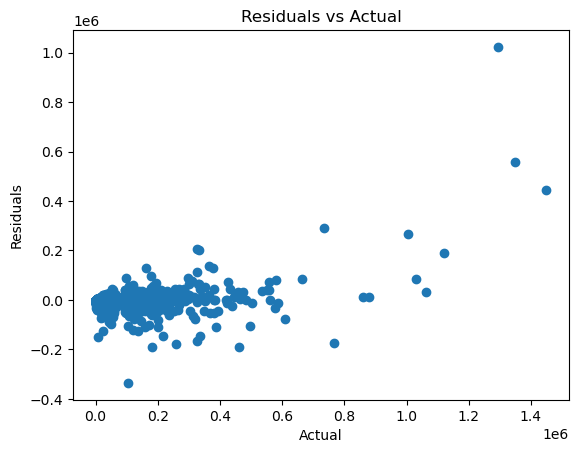

In [153]:
_,test_final_df_eng,_ = feature_engineering_numerical(final_test_df)
X_test, y_test = test_final_df_eng.drop('total_sales_price', axis=1), test_final_df_eng['total_sales_price']

# Load the model
model = pickle.load(open('../models/final_predictive_model.pkl', 'rb'))

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"R2: {r2}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")

# Residual Analysis - check for homoscedasticity
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual')
plt.show()

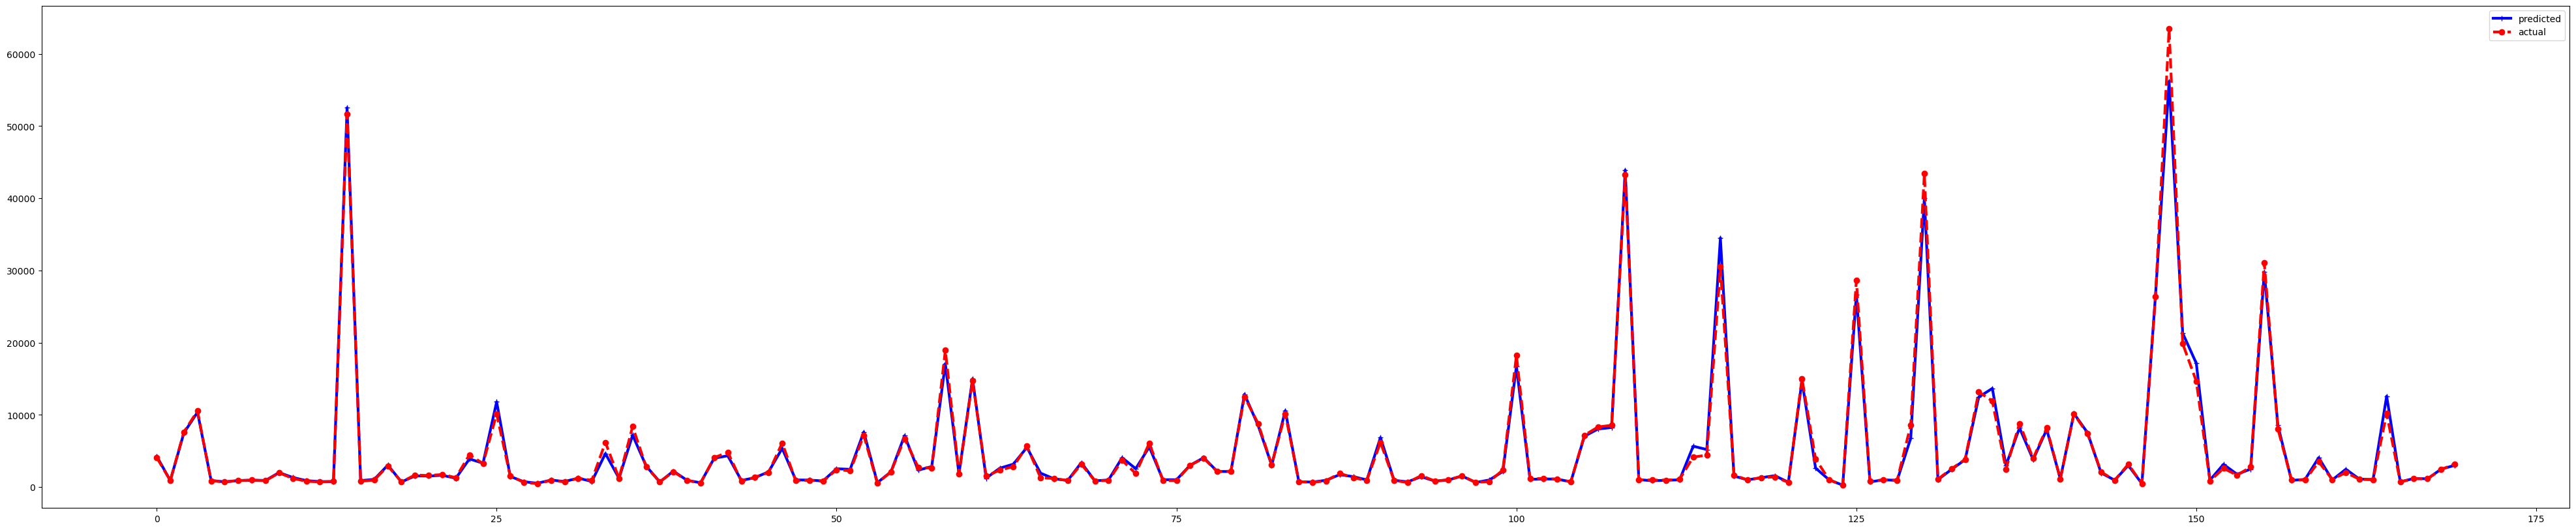

In [154]:
# Plot the model
y_pred = y_pred.reshape(y_test.shape[0], 1)
y_test = y_test.to_numpy().reshape(y_test.shape[0], 1)
plt.figure(figsize=(50,10))
plt.plot(y_pred[3100:3270], 'b+-', label='predicted', linewidth=3)
plt.plot(y_test[3100:3270],'ro--',label='actual', linewidth=3)
plt.legend()
plt.show()

In [155]:
new_diamond = pd.DataFrame({
    'carat_weight': [1.5],
    'cut': ['Ideal'],
    'color': ['D']
})

# model.predict(new_diamond)  